In [3]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import time
import matplotlib.pyplot as plt

In [4]:
store = pd.HDFStore('X_pca.h5')
X_pca = store['X_pca']

store = pd.HDFStore('y_default.h5')
y_default = store['y_default']

store = pd.HDFStore('y_prepay.h5')
y_prepay = store['y_prepay']

In [5]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_default, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

Iteration 1, loss = 0.34271671
Iteration 2, loss = 0.33554842
Iteration 3, loss = 0.33245177
Iteration 4, loss = 0.33085488
Iteration 5, loss = 0.32975649
Iteration 6, loss = 0.32877623
Iteration 7, loss = 0.32896214
Iteration 8, loss = 0.32821453
Iteration 9, loss = 0.32794700
Iteration 10, loss = 0.32765704
Iteration 11, loss = 0.32734474
Iteration 12, loss = 0.32730009
Iteration 13, loss = 0.32705681
Iteration 14, loss = 0.32652117
Iteration 15, loss = 0.32658174
Iteration 16, loss = 0.32655813
Iteration 17, loss = 0.32686056
Iteration 18, loss = 0.32651384
Iteration 19, loss = 0.32644136
Iteration 20, loss = 0.32648728


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


No Skill: ROC AUC=0.500
MLPClassifier: ROC AUC=0.780


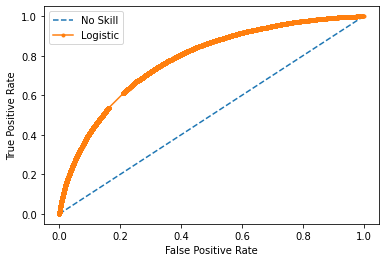

In [6]:
time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=20, early_stopping=False, learning_rate_init=0.01, verbose=True)
model.fit(trainX, trainy)
time_end = time.time()

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [7]:
trainX, testX, trainy, testy = train_test_split(X_pca, y_prepay, test_size=0.2, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

Iteration 1, loss = 0.51292875
Iteration 2, loss = 0.49086864
Iteration 3, loss = 0.48398167
Iteration 4, loss = 0.48060195
Iteration 5, loss = 0.47694811
Iteration 6, loss = 0.47521658
Iteration 7, loss = 0.47236335
Iteration 8, loss = 0.47035224
Iteration 9, loss = 0.46901135
Iteration 10, loss = 0.46820776
Iteration 11, loss = 0.46651838
Iteration 12, loss = 0.46651788
Iteration 13, loss = 0.46588800
Iteration 14, loss = 0.46494862
Iteration 15, loss = 0.46465857
Iteration 16, loss = 0.46386974
Iteration 17, loss = 0.46407361
Iteration 18, loss = 0.46309991
Iteration 19, loss = 0.46302462
Iteration 20, loss = 0.46275650


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


No Skill: ROC AUC=0.500
MLPClassifier: ROC AUC=0.852


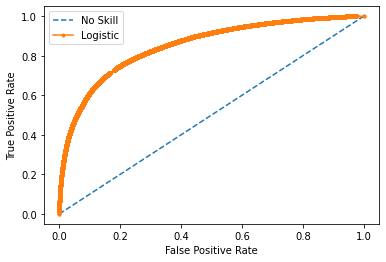

In [8]:
time_start = time.time()
model = MLPClassifier(hidden_layer_sizes=(128, 32, 32, 128), max_iter=20, early_stopping=False, learning_rate_init=0.01, verbose=True)
model.fit(trainX, trainy)
time_end = time.time()

lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('MLPClassifier: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()